In [2]:
#Load necessary packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(ggplot2)
library("gridExtra")
library(GGally)
library(ggplot2)




── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

The dataset is compiled of 4 seperate databases sourced from the UCI Machine Learning Database. All of the databases contain the following variables:

1. Age: age of the individual (years)

2. Sex: gender of the individual 1 = male 0 = female

3. Chest-pain type: type of chest-pain experienced by the individual 
(1 = typical angina, 2 = atypical angina, 3 = non anginal pain, 4 = asymptotic)

4. Resting Blood Pressure: resting blood pressure value of an individual (in mmHg)

5. Serum Cholestrol: serum cholesterol (mg/dl unit)

6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true), else : 0 (false)

7. Resting ECG : resting electrocardiographic results 
(0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy)
8. Max heart rate achieved : max heart rate achieved by an individual.
9. Exercise induced angina (1 = yes. 0 = no)
10. ST depression induced by exercise relative to rest: displays the value which is an integer or float.
11. Peak exercise ST segment : 1 = upsloping 2 = flat 3 = downsloping
12. Number of major vessels (0–3) colored by flourosopy : integer or float.
13. Thal : thalassemia : 3 = normal 6 = fixed defect 7 = reversible defect
14. diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)



In [3]:

#cleveland data
cleveland<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                col_name=FALSE)|>
mutate(source="cleveland")
colnames(cleveland)<-c("age","sex","type","rbp","cholesterol","fbs","rECG","thalach","excr_ang","old_pk","slope","ca","thal","disease","source")
cleveland$disease<-ifelse(cleveland$disease==0, "true","false")


#hungary data
hungary<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data",
                col_name = FALSE)|>
mutate(source="hungary")
colnames(hungary)<-c("age","sex","type","rbp","cholesterol","fbs","rECG","thalach","excr_ang","old_pk","slope","ca","thal","disease","source")
hungary$disease<-ifelse(hungary$disease==0, "true","false")

#long beach data
va<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                col_name=FALSE)|>
mutate(source="va")
colnames(va)<-c("age","sex","type","rbp","cholesterol","fbs","rECG","thalach","excr_ang","old_pk","slope","ca","thal","disease","source")
va$disease<-ifelse(va$disease==0, "true","false")

#switzerland data
swtz<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                col_name=FALSE)|>
mutate(source="swtz")
colnames(swtz)<-c("age","sex","type","rbp","cholesterol","fbs","rECG","thalach","excr_ang","old_pk","slope","ca","thal","disease","source")
swtz$disease<-ifelse(swtz$disease==0, "true","false")


#combine into one database

heart_data_OG<-rbind(va,hungary,cleveland,swtz)


heart_data_OG

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X7, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `sh

age,sex,type,rbp,cholesterol,fbs,rECG,thalach,excr_ang,old_pk,slope,ca,thal,disease,source
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
63,1,4,140,260,0,1,112,1,3,2,?,?,false,va
44,1,4,130,209,0,1,127,0,0,?,?,?,true,va
60,1,4,132,218,0,1,140,1,1.5,3,?,?,false,va
55,1,4,142,228,0,1,149,1,2.5,1,?,?,false,va
66,1,3,110,213,1,2,99,1,1.3,2,?,?,true,va
66,1,3,120,0,0,1,120,0,-0.5,1,?,?,true,va
65,1,4,150,236,1,1,105,1,0,?,?,?,false,va
60,1,3,180,0,0,1,140,1,1.5,2,?,?,true,va
60,1,3,120,0,?,0,141,1,2,1,?,?,false,va


Now that the dataset has been compiled and read, we can tidy it to remove any missing values, change the class of variables to allow for classification, and select the relevant predicting variables. Additionally, the numerical character labels for 'sex' and 'type' where given english labels for visualization purposes.

In [9]:
#tidy data

heart_data<-heart_data_OG|>
select(source, disease, age, sex, rbp,thalach, type, cholesterol)|>
filter(type!="?",
       sex!="?",
       rbp!="?",
       cholesterol!="NA",
       cholesterol!="0",
       rbp!="0",
      thalach!="?")|>
mutate(sex=as.numeric(sex),
      rbp=as.numeric(rbp),
      type=as.factor(type),
       type=as.factor(type),
       disease=as.factor(disease),
        thalach=as.numeric(thalach),
      cholesterol=as.numeric(cholesterol)
      )|>
na.omit()



heart_data$type <- factor(heart_data$type,
levels = c('1','2','3','4'),
labels = c("typical angina", "atypical angina","non-anginal","asymptomatic"))

heart_data$sex <- factor(heart_data$sex,
levels = c('0','1'),
labels = c("female", "male"))
heart_data


       




Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


source,disease,age,sex,rbp,thalach,type,cholesterol
<chr>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
va,false,63,male,140,112,asymptomatic,260
va,true,44,male,130,127,asymptomatic,209
va,false,60,male,132,140,asymptomatic,218
va,false,55,male,142,149,asymptomatic,228
va,true,66,male,110,99,non-anginal,213
va,false,65,male,150,105,asymptomatic,236
va,false,60,male,160,157,atypical angina,267
va,true,56,male,126,140,atypical angina,166
va,true,62,male,120,86,asymptomatic,220


The data was split into a training and a testing set. The training set, containing 75% of our data, will be used to build and teach the model. The testing set, containing 25% of our data, will remain untouched during the model contruction and will only be used to test the model's accuracy after it has been built.

In [10]:
#Split the data
set.seed(4321) 
heart_splt <- initial_split(heart_data, prop = 0.75
                           , strata =disease)
heart_train <- training(heart_splt)
heart_test<- testing(heart_splt)

##preliminary data analysis

Once the training set was created, we first checked if there were any rows with missing data for any of the variables.

In [6]:
# Check if there are any rows with missing data
print("Table 1: Number of Rows with Missing Data for the Predictor and Classifier Variables")
heart_missing <- map_df(heart_train, ~sum(is.na(.)))
heart_missing


[1] "Table 1: Number of Rows with Missing Data for the Predictor and Classifier Variables"


source,disease,age,sex,rbp,thalach,type,cholesterol
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0


The next step is checking the number of observations that both the training set and the orgininal have for each class label. This is to check that both data sets have the same ratio between the class labels. We also want to make sure that the distrobution of class labels in the dataset is equal, since unequal distrobution can lead to inaccurate predictions.

In [7]:
print("Table 1: Number of Observations for the Predictor and Class Labels-Training Set")
num_obs <- nrow(heart_train) 
heart_train|>
group_by(disease)|>
summarize(n = n(),
            percentage = n() / num_obs * 100) 
print("Table 1: Number of Observations for the Predictor and Class Labels-Original Data")
num_obs <- nrow(heart_data) 
heart_data|>
group_by(disease)|>
summarize(n = n(),
            percentage = n() / num_obs * 100) 

[1] "Table 1: Number of Observations for the Predictor and Class Labels-Training Set"


disease,n,percentage
<fct>,<int>,<dbl>
false,302,50.33333
true,298,49.66667


[1] "Table 1: Number of Observations for the Predictor and Class Labels-Original Data"


disease,n,percentage
<fct>,<int>,<dbl>
false,403,50.31211
true,398,49.68789


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

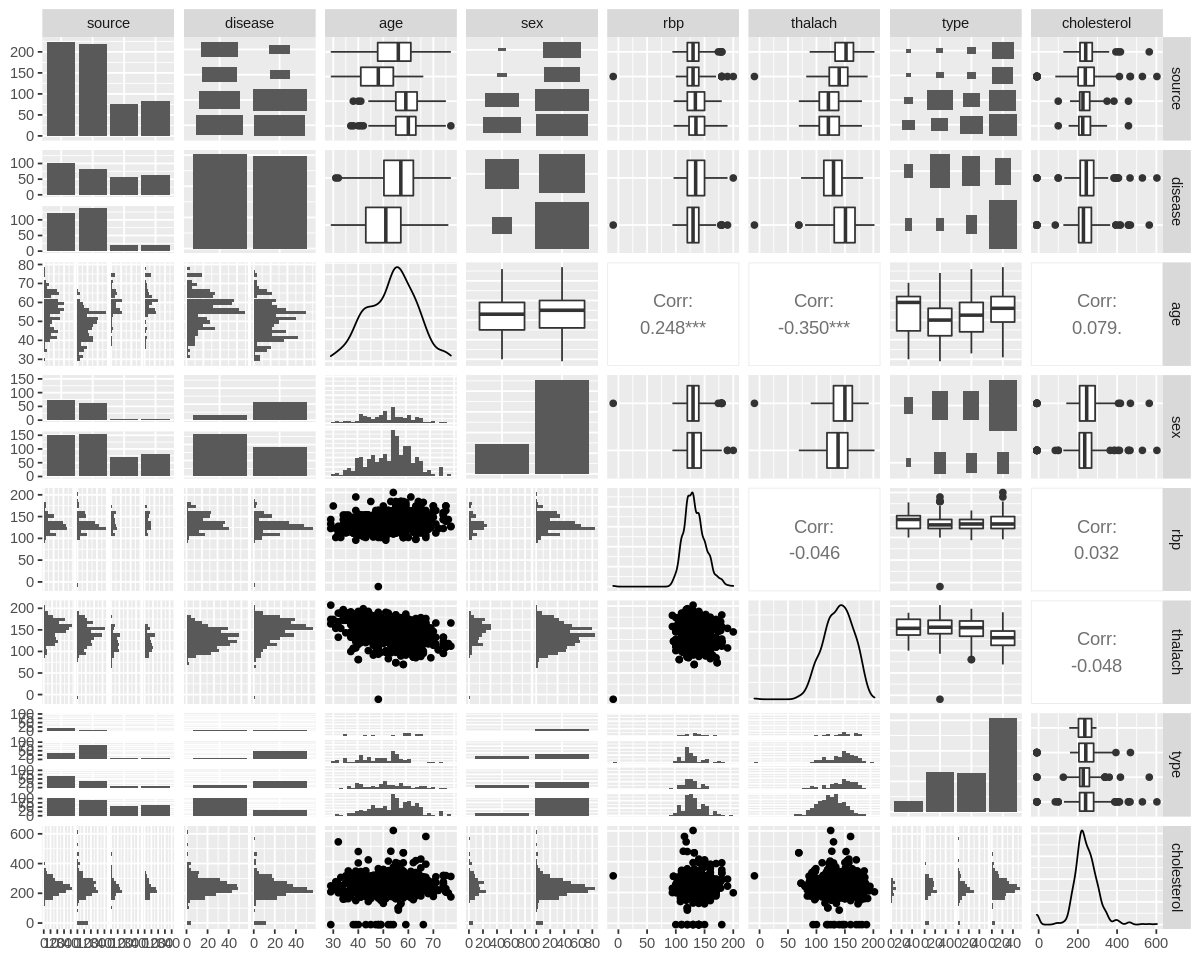

In [8]:
options(repr.plot.height = 8, repr.plot.width = 10)



heart_pairs<-ggpairs(heart_train, columns=1:8)

heart_pairs

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


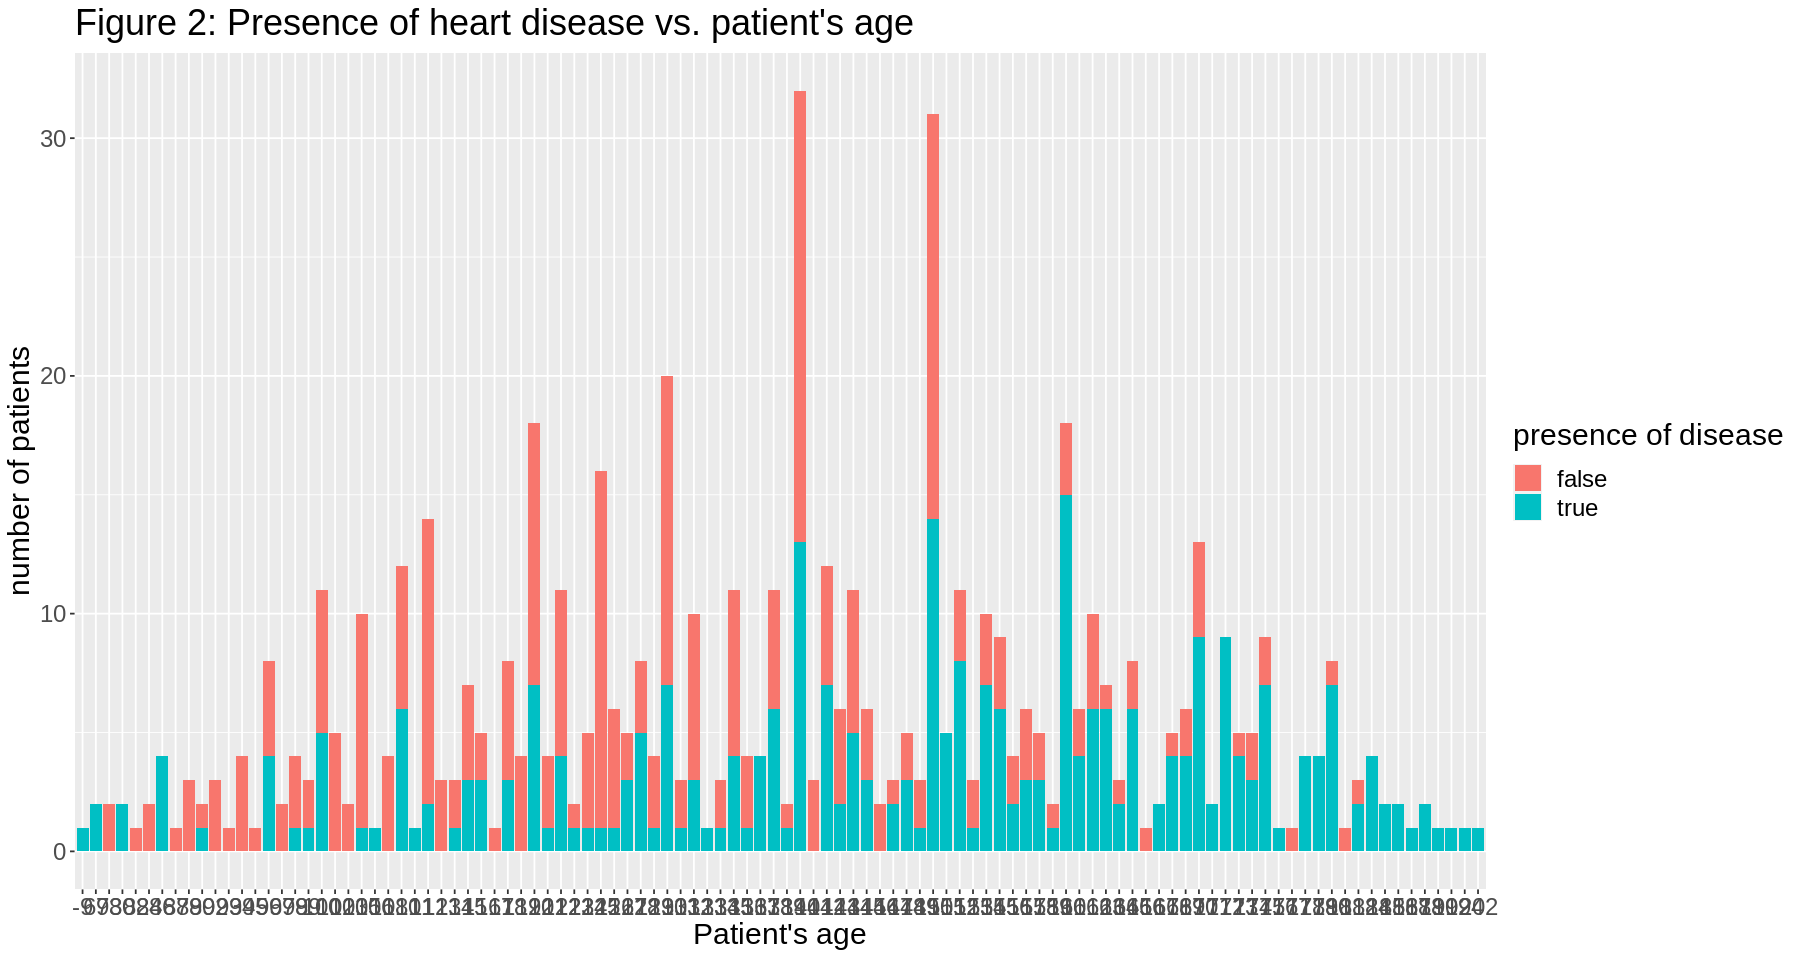

In [17]:





options(repr.plot.width = 15, repr.plot.height = 8)
thalach_dist <- ggplot(heart_train, aes(x = factor(thalach) ,fill=disease))+ 
                  geom_histogram(stat="count", bins=20) + 
                  labs(x = "Patient's age", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's age") + 
                  theme(text = element_text(size = 18)) 


                 

thalach_dist

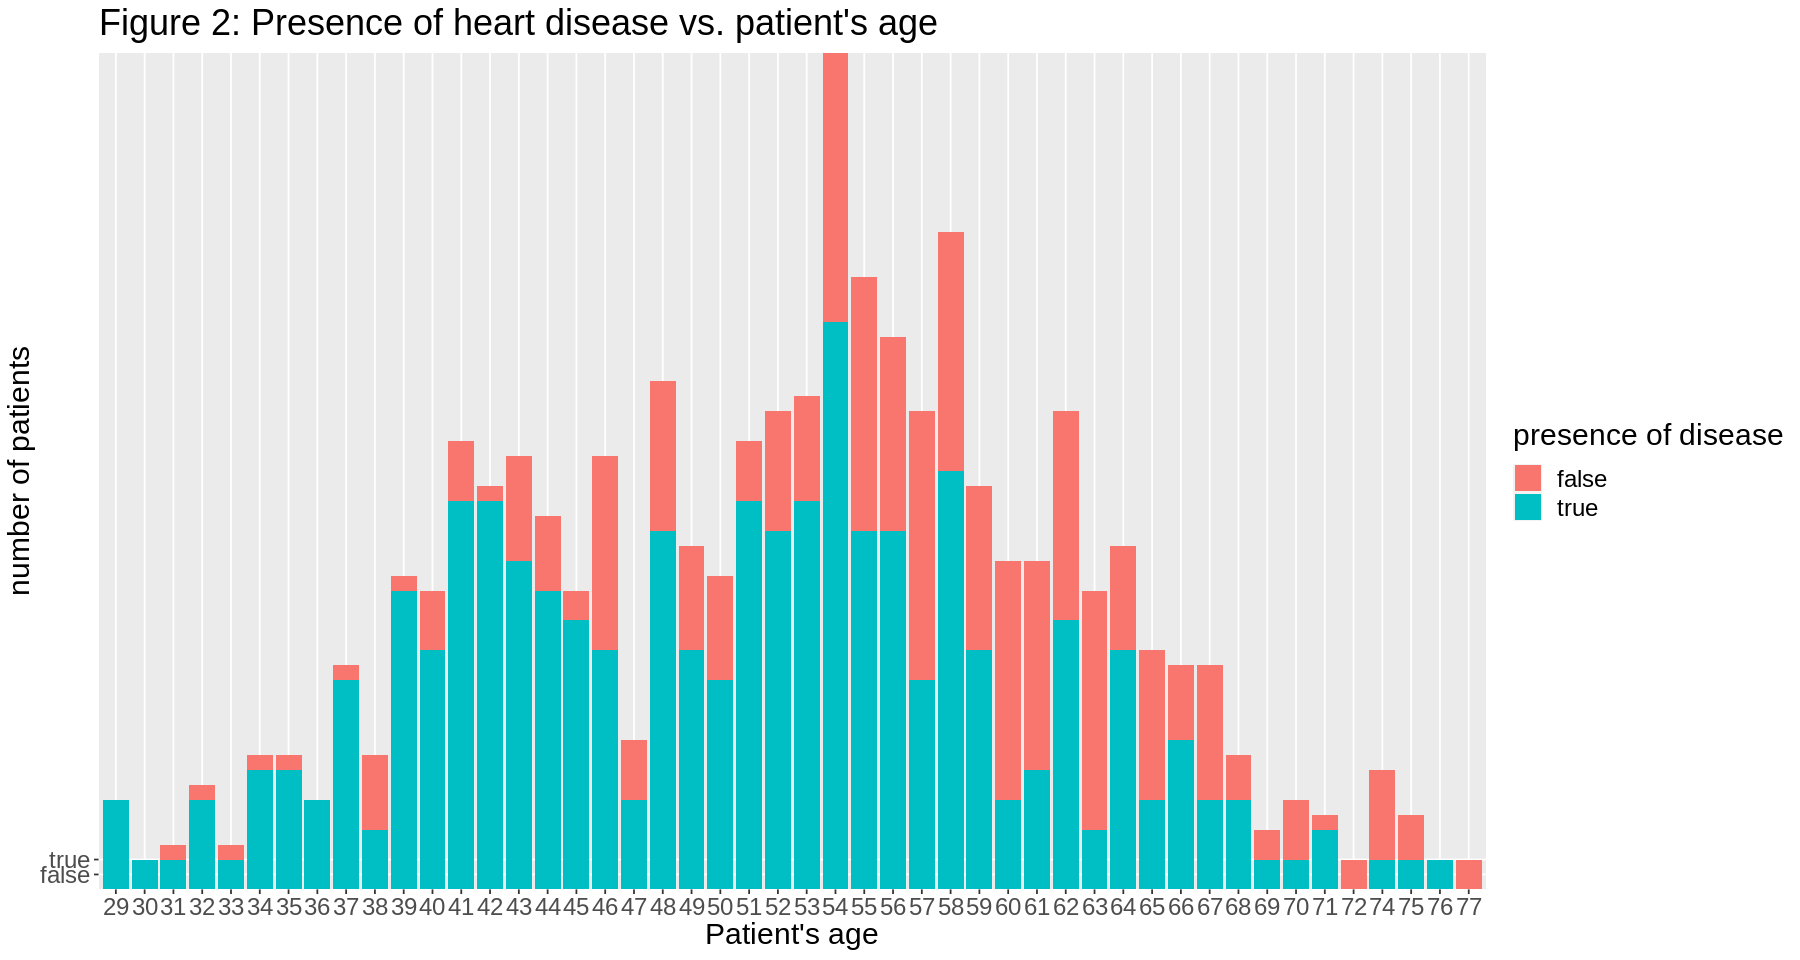

In [11]:
options(repr.plot.width = 12, repr.plot.height = 8)



options(repr.plot.width = 15, repr.plot.height = 8)
age_dist <- ggplot(heart_train, aes(x = factor(age), y = disease, fill=disease))+ 
                  geom_bar(stat = "identity") + 
                  labs(x = "Patient's age", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's age") + 
                  theme(text = element_text(size = 18)) 


     

age_dist

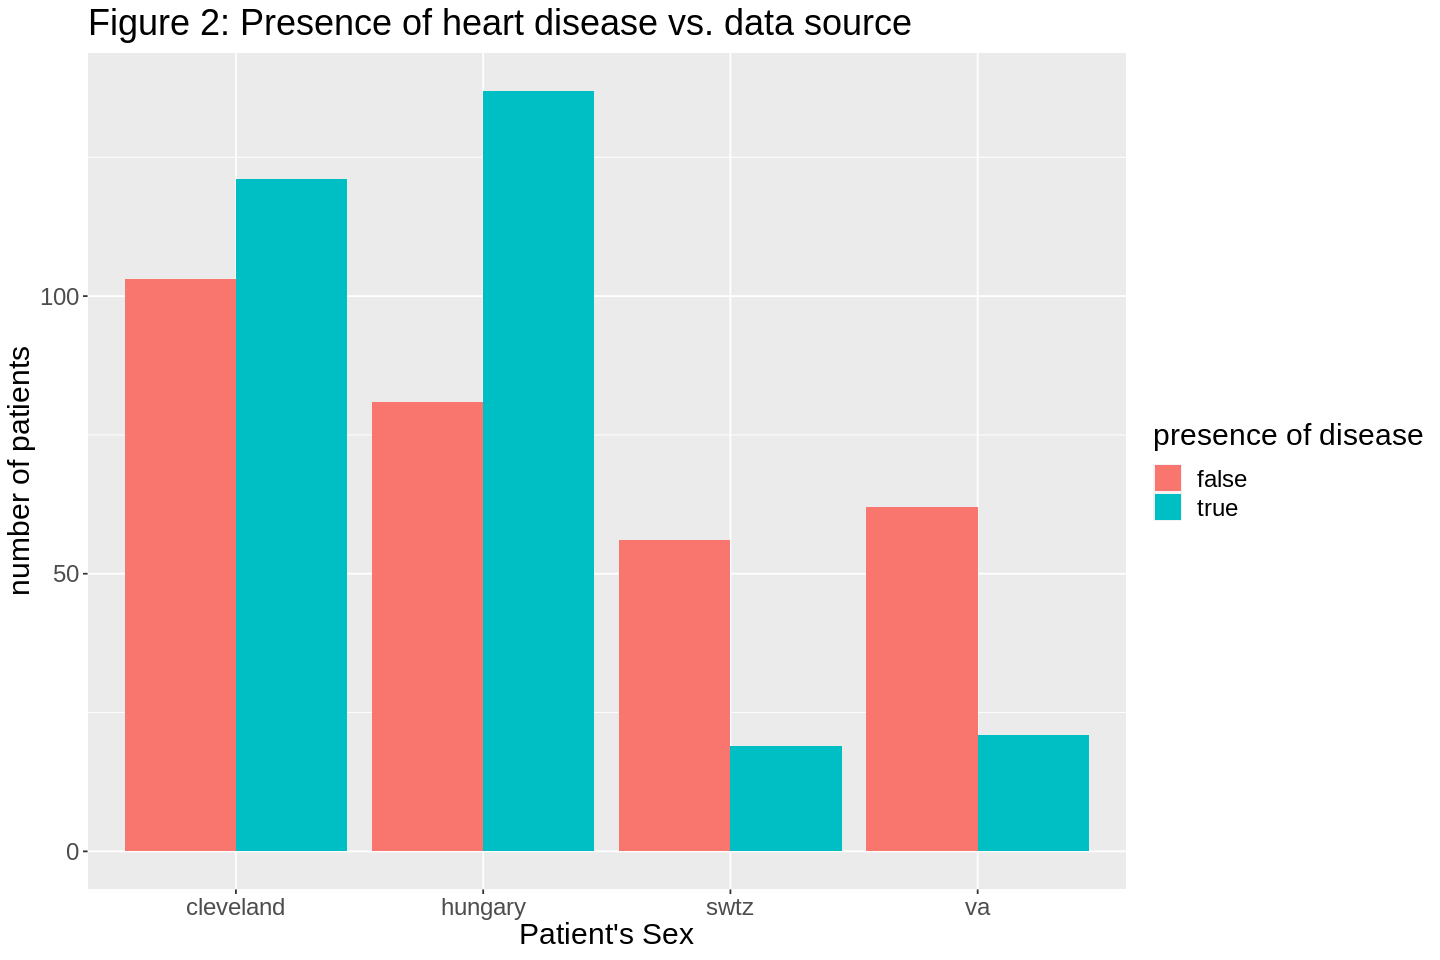

In [12]:
options(repr.plot.width = 12, repr.plot.height = 8)
source_dist <- ggplot(heart_train, aes(x = source, fill = disease)) + 
                  geom_bar(position= "dodge") + 
                  labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. data source") + 
                  theme(text = element_text(size = 18)) 
                  

source_dist

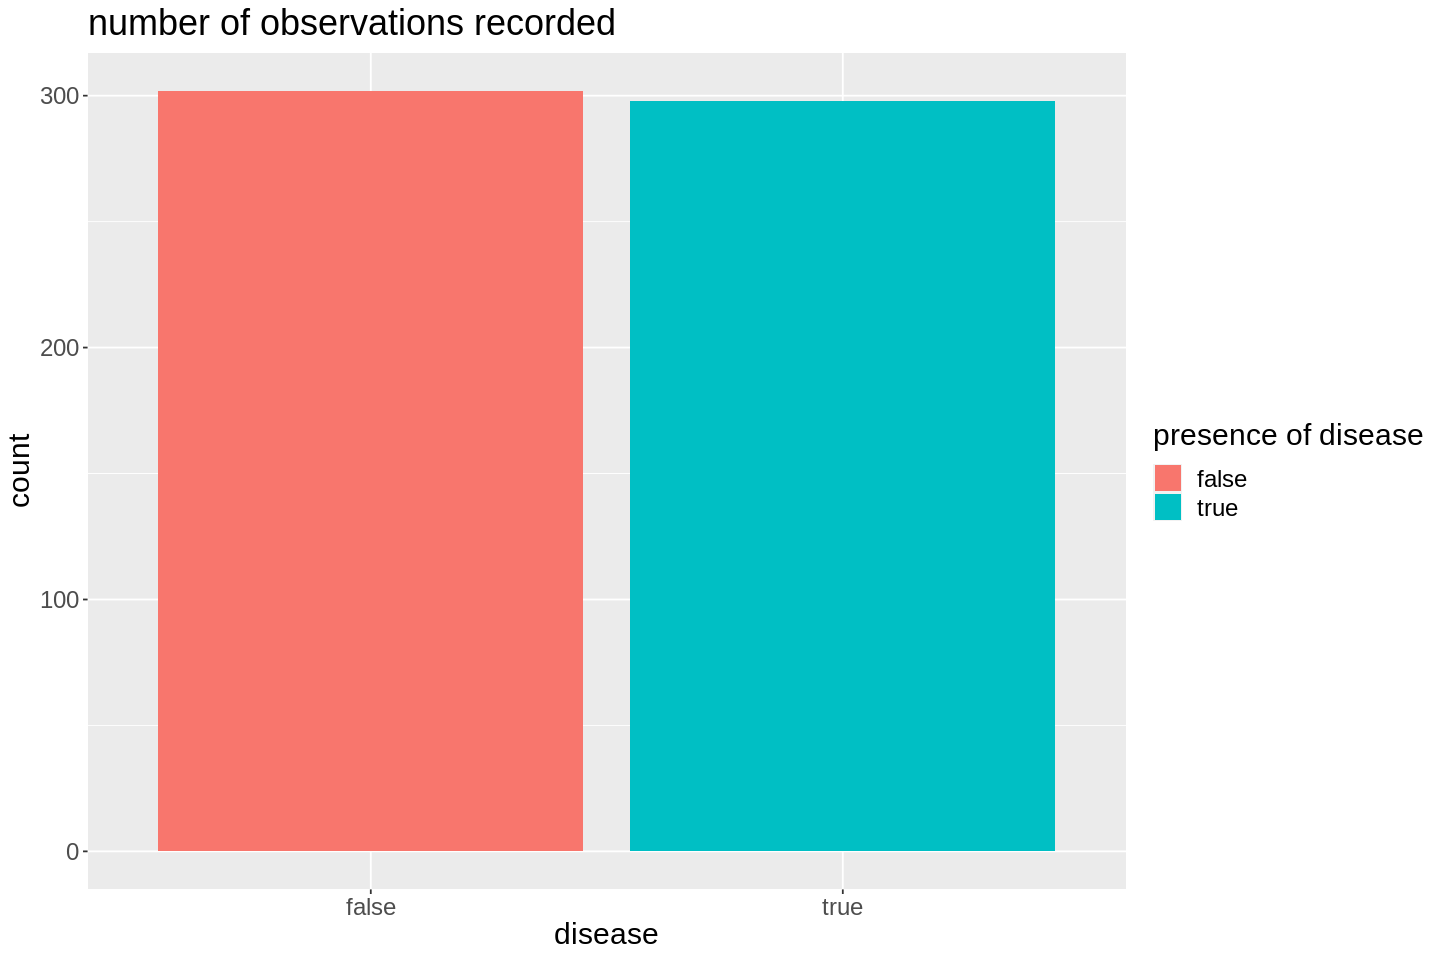

In [13]:
options(repr.plot.width = 12, repr.plot.height = 8)
disease_dist <- ggplot(heart_train, aes(x=disease,fill = disease)) + 
                  geom_bar() + 
                  labs( y = "count",fill = "presence of disease",title = "number of observations recorded") + 
                  theme(text = element_text(size = 18)) 
                  

disease_dist

[1] "Number of Female Observations:145"
[1] "Number of Male Observations:455"


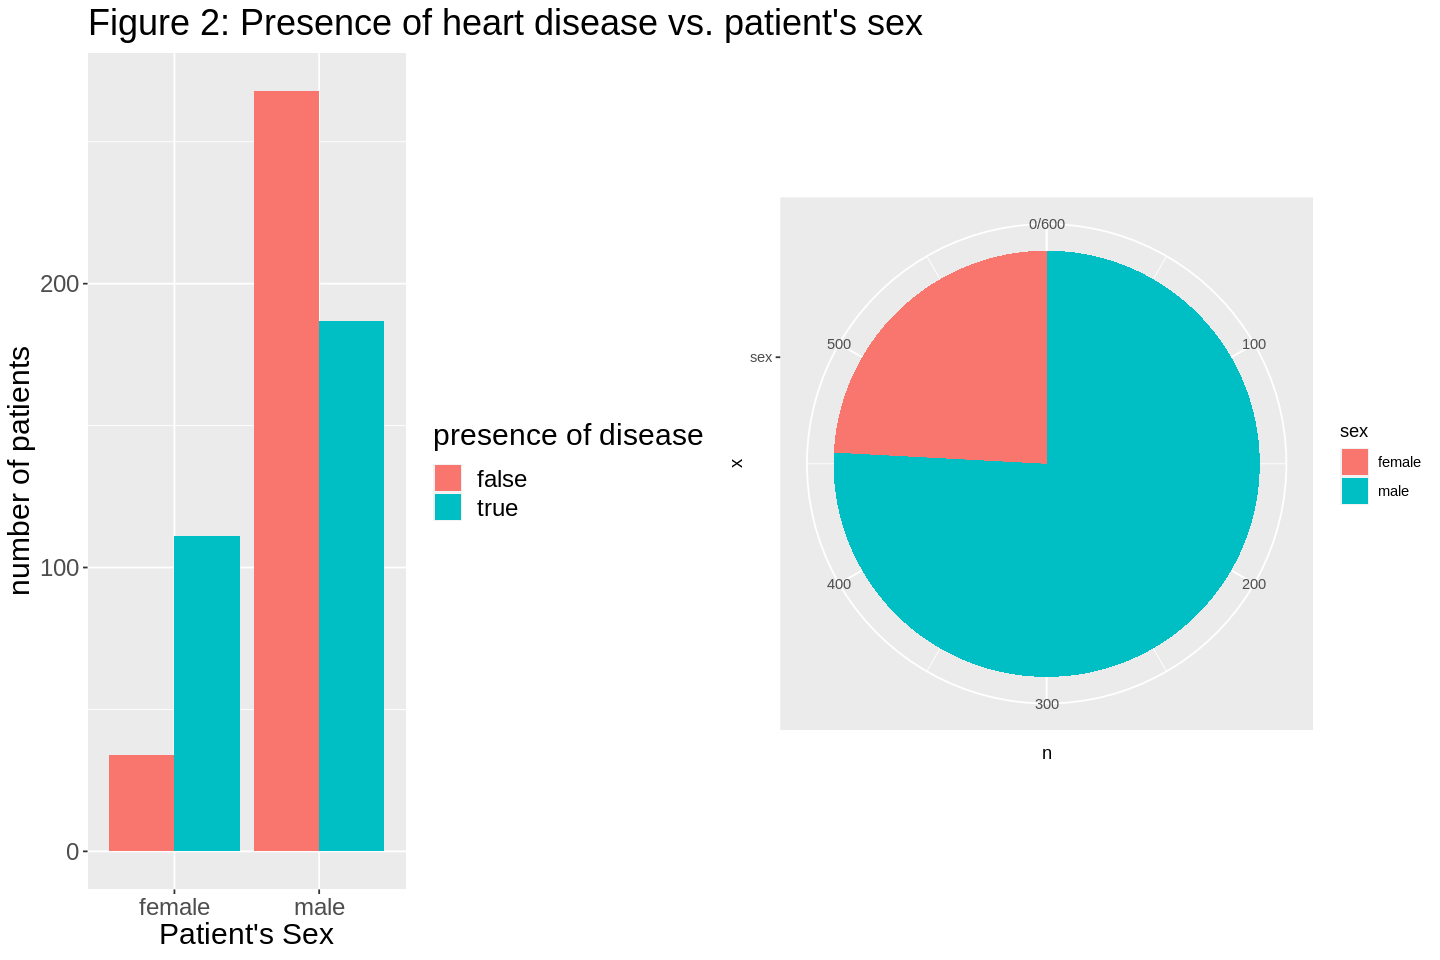

In [43]:
options(repr.plot.width = 12, repr.plot.height = 8)
sex_dist <- ggplot(heart_train, aes(x=sex, fill = disease)) + 
                  geom_bar(position= "dodge") + 
                  labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's sex") + 
                  theme(text = element_text(size = 18)) 
                  

sex_num<-heart_train|>
count(sex)
print(paste("Number of Female Observations:145"))
print(paste("Number of Male Observations:455"))

sex_prop<-ggplot(sex_num, aes(x="sex", y=n, fill=sex)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)


grid.arrange(sex_dist, sex_prop, ncol=2)

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
rbp_dist <- ggplot(heart_train, aes(x= rbp, fill=disease)) + 
                  geom_bar()+
                  labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's sex") + 
                  theme(text = element_text(size = 20)) 
rbp_dist

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
chol_dist <- ggplot(heart_train, aes(x= age, y=cholesterol, color=disease)) + 
                  geom_point()+
                  labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's sex") + 
                  theme(text = element_text(size = 20)) 
chol_dist

In [ ]:
##predictive analysis

To built the recipe, rank was selected as the target variable while the predicting variables were specified as aces, rank points, age and draw size. The variables were scaled and centered to ensure that their mean was zero and their standard deviation was one. Without the standardization process, our predictors will have unequal effects on our classifier which would decrease the prediction accuracy of our model.

In [ ]:
#creating recipe
recipe<- recipe(disease ~age+ sex+ rbp, data = heart_train) |>
step_scale(all_predictors())|>
    step_center(all_predictors())



Cross validation helps us choose the k-value to maximizes the prediction accuracy of our model. The 5-fold method randomly divides the training dataset into 5 evenly sized subsets of data. One of the subsets (or folds) is used for validation while the remaining 4 compose the training set. The process is repeated 5 times, using all subsets to calulate the accuracy of each K-value on each subset.

In [ ]:
set.seed(4321)
#Code Source: the following code was taken from " DSCI_100-Group-project" by Hannah Martin, and it was modified to suit this project 

# preform cross-validation
data_vfold <- vfold_cv(heart_train, v = 5, strata = disease)
#tune model and fit to workflow
knn_tune<- nearest_neighbor(weight_func ="rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

#create data frame with K = [5, 10, 15, ... 100]
gridvals <- tibble(neighbors = seq(from = 5, to = 100, by = 5))
print("Table 1: Neighbors Used for Tuning the Model")
gridvals

Seting the engine to "kknn" and the mode to "classification" specified the type of model we're building; K-nn classification. By setting the neighbors to "tune()" opposed to a specific number allows multiple k-values to be tested as once instead of just one. Our model tested every fifth value from 0-100 which provided a large range of K-values without drastically increasing the computation time.

The workflow is used to combine the recipe, model specificaton, model tuning and to collect the metrics. The tune_grid function was used to determine the accuracies of our model (in addition to mean and standard deviation) while the collect_metrics function collected these values together. The mean value corresponds to the estimated model accuracy while the standard error measures the magnitute of uncertainty surrounding the mean,.

In [ ]:
#Code Source: the following code was taken from " DSCI_100-Group-project" by Hannah Martin, and it was modified to suit this project 

set.seed(4321)

#collect tuning results

match_tune_res <- workflow() |>
                    add_recipe(recipe) |> 
                    add_model(knn_tune)|> 
                    tune_grid(resamples = data_vfold, grid = gridvals)|>
                    collect_metrics()

#plotting accuracy vs. number of neighbours

accuracies <- match_tune_res |>
    filter(.metric == "accuracy") |>
    arrange(desc(mean))
print("Accuracy metrics arranged in descending order for various K-Values")
accuracies

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "neighbors (K-values)", y = "accuracy estimate", title = "model accuracy vs. number of neighbors used") +
    scale_x_continuous(breaks = seq(5, 100, by = 5)) +    
    theme(text = element_text(size = 20))
accuracy_versus_k

To visualize how the model accuracy varies across the various K-values, the accuracy metrics obtained from tuning where graphed against the K-values. In general, the accuracy of our model increased as K got larger, with a peak occuring at K=50 .Now that we know the most accurate K value, we can rebuild and retrain our model using k=50in our workflow.

In [ ]:

# Retrain model
best_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 50)|>
                    set_engine("kknn")|>
                    set_mode("classification")

# Combine model in workflow
best_fit <- workflow()|>
            add_recipe(recipe) |>
            add_model(best_model) |>
            fit(data = heart_train)

In [ ]:

# Make predictions
predict <- best_fit|> 
    predict(heart_test)|> 
    bind_cols(heart_test)

prediction_accuracy <- predict|>
    metrics(truth = disease, estimate = .pred_class)|> 
    filter(.metric == "accuracy")
print("Table 6: Prediction Accuracy for K-nn classification with 50 Neighbours")
prediction_accuracy






The fit and predict functions were used to predict testing set labels with our trained model. Then, the metrics function gave us a summary on the prediction accuracy of our model. The table returned by this function gave us an accuracy value of approximately 67%, meaning that our model is 67% accurate when predicting labels in the testing set. We can find more information on the predicted testing set labels by building a confusion matrix.

In [ ]:
conf_matrix <- predict|>
    conf_mat(truth = disease, estimate = .pred_class)
print("Table 7: Confusion Matrix for K-nn classification with 50 Neighbours")
conf_matrix

##discussion

Using the metrics function, we found that the classification model (using k=50) was able to predict the class of an observation in the testing set correctly 66.995% of the time. The confusion matrix found that the model predicted 75% of the TRUE values in the testing set correctly, however only 56% of the TRUE observations were correct. Additionally, the model predicted 92% of the FALSE values in the testing set and 96% of the FALSE obervations made were correct. 

##CITATIONS

Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano, R. (1989, May 30). Heart Disease Data Set. Retrieved from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/. 

Martin, H. (n.d.). DSCI_100-group-project/dsci_100_project.ipynb at Main · Hmartin11/DSCI_100-Group-project. GitHub. Retrieved from https://github.com/hmartin11/DSCI_100-Group-Project/blob/main/DSCI_100_project.ipynb 

Timbers, T., Campbell, T., &amp; Lee, M. (2022). Data science: A First Introduction. https://doi.org/10.1201/9781003080978 